In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("../data/stroke_prediction.csv")

In [3]:
df.shape

(5110, 12)

Finds the number of null values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

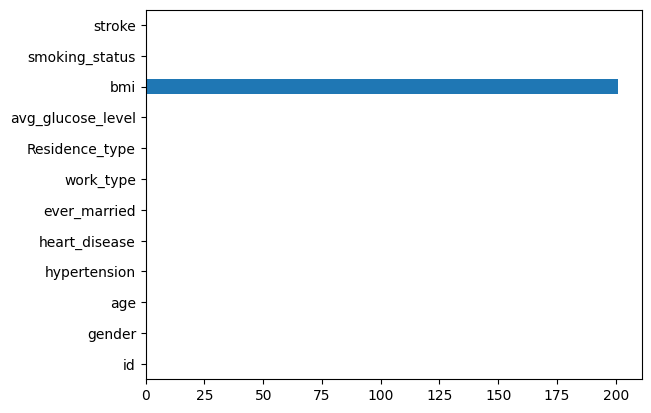

In [4]:
print(df.isna().sum())
df.isna().sum().plot.barh()

Found 201 NULL values in bmi column

Provides basic statistical analysis of all numberical type attributes
 count, mean, standaard deviation, minimum values, all quartiles, maximum values

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Provides the data type of all attributes, number of not null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Pandas DataFrame.dtypes attribute return the dtypes in the DataFrame. It returns a Series with the data type of each column.

PRE PROCESSING

Handling NULL values
analysing the attributes

dropping the ID attribute as it does not provide any statistical insights during data prediction


Reducing a dimension

In [8]:
df = df.drop(['id'],axis=1)


 Histogram

<Axes: xlabel='bmi', ylabel='Count'>

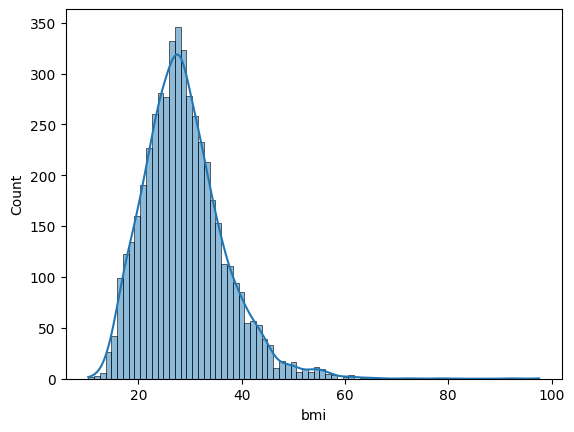

In [9]:
sns.histplot(df['bmi'],kde = True)

Boxplot

<Axes: ylabel='bmi'>

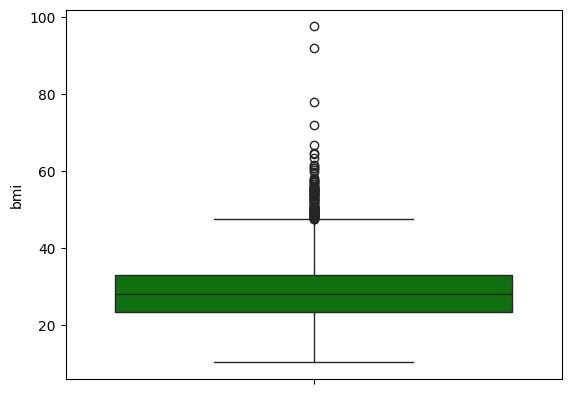

In [10]:
sns.boxplot(data = df['bmi'],color = 'green')

 visual analysis
the data is positivly skewed and has 1 sided outlier

gender analysis

In [11]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

We have a other gender and since there is only 1 instance we will remove it as to reduce the dimension of age

<Axes: ylabel='count'>

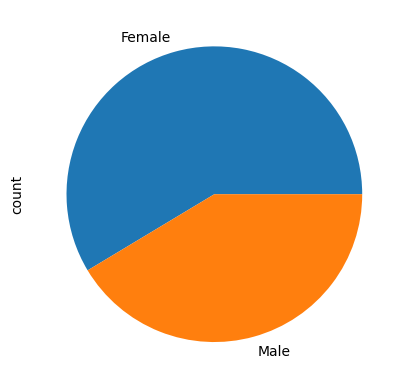

In [12]:
df['gender'] = df['gender'].replace('Other','Female')
df['gender'].value_counts().plot(kind="pie")

<Axes: xlabel='gender'>

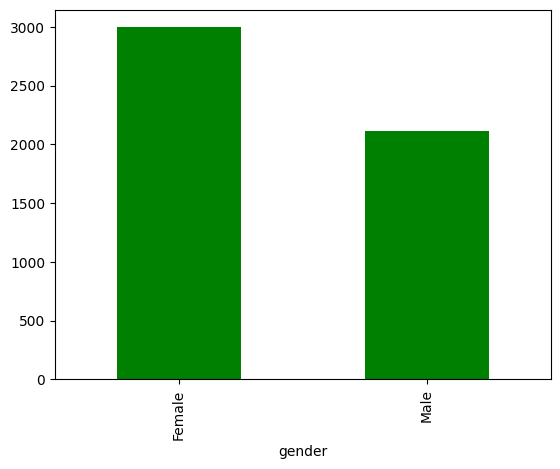

In [13]:
df['gender'].value_counts().plot(kind="bar",color = "green")

 There are more females as compared to males 

 
We have a other gender and since there is only 1 instance we will remove it as to reduce the dimension of age

Target feature 

Stroke analysis

<Axes: xlabel='stroke', ylabel='Count'>

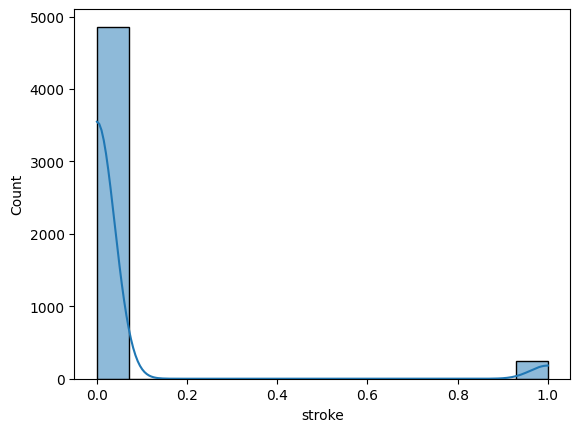

In [14]:
df['stroke'].value_counts()
sns.histplot(df['stroke'],kde = True)

<Axes: xlabel='stroke'>

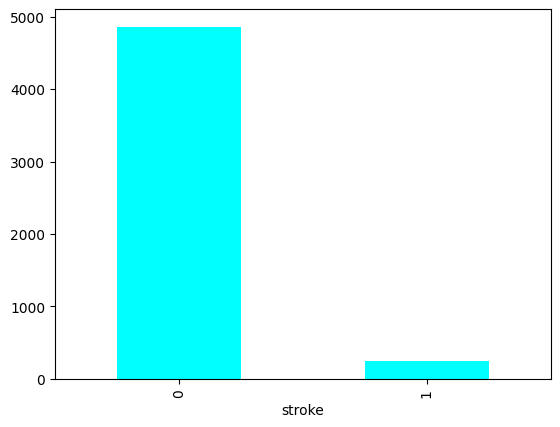

In [15]:
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [16]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


The dataset is highly skewed . we need to perform transformations to improve samples of minority class 

Hyper tension Analysis

In [17]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: ylabel='count'>

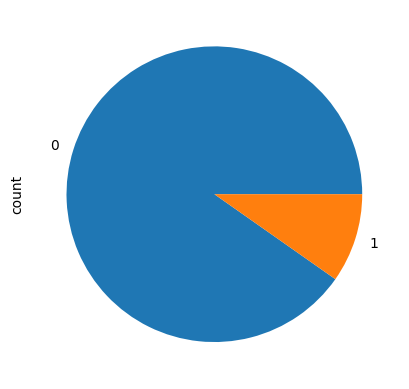

In [18]:
df['hypertension'].value_counts().plot(kind="pie")

<Axes: xlabel='hypertension'>

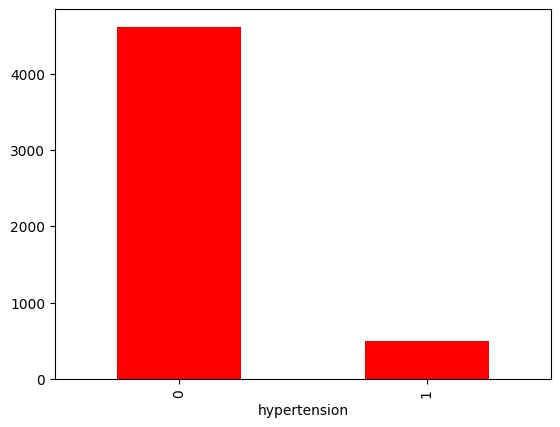

In [19]:
df['hypertension'].value_counts().plot(kind="bar",color = "red")

work type Analysis

In [20]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: ylabel='count'>

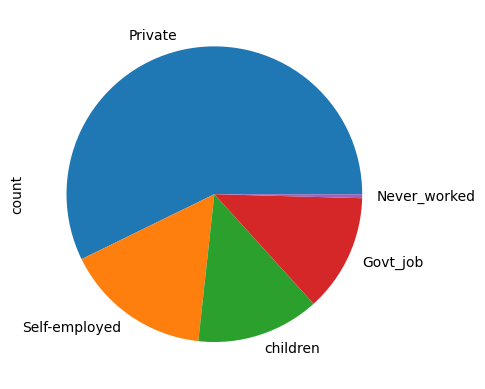

In [21]:
df['work_type'].value_counts().plot(kind="pie")

<Axes: xlabel='work_type'>

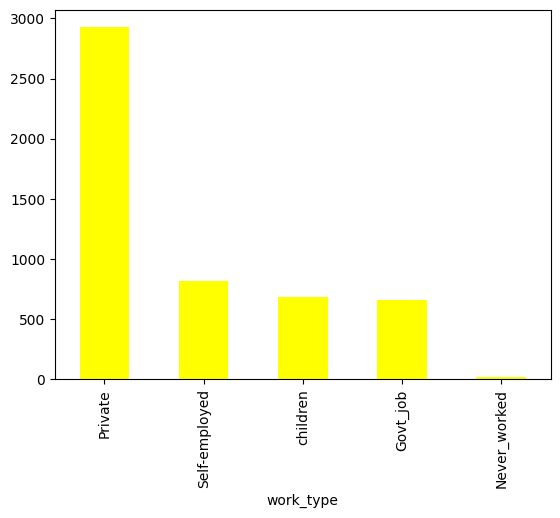

In [22]:
df['work_type'].value_counts().plot(kind="bar",color = "yellow")

smoking status Analysis

In [23]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: ylabel='count'>

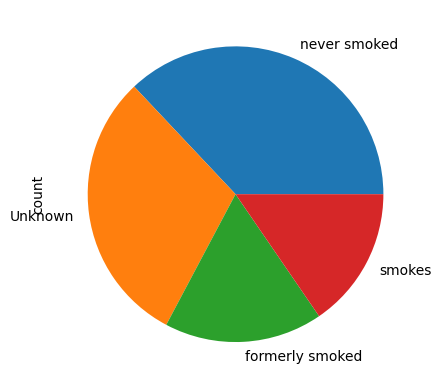

In [24]:
df['smoking_status'].value_counts().plot(kind="pie")

<Axes: xlabel='smoking_status'>

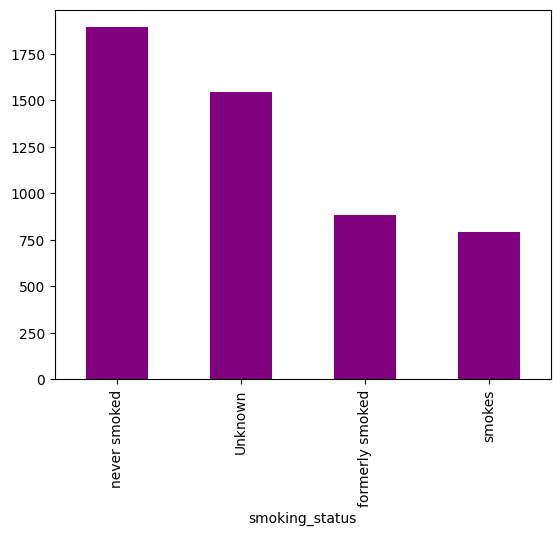

In [25]:
df['smoking_status'].value_counts().plot(kind="bar",color = "purple")

Residence type Analysis

In [26]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: ylabel='count'>

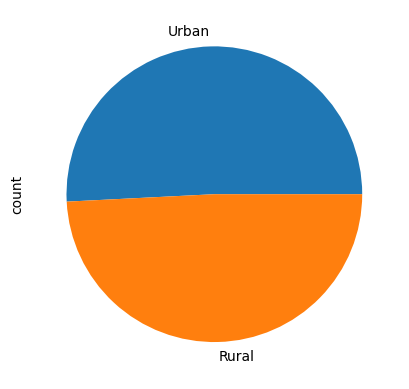

In [27]:
df['Residence_type'].value_counts().plot(kind="pie")

<Axes: xlabel='Residence_type'>

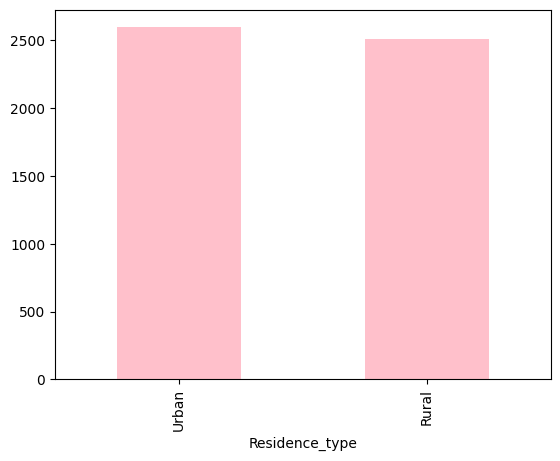

In [28]:
df['Residence_type'].value_counts().plot(kind="bar",color = "pink")

we have an equal percentage of population who are from Urban and rural areas

Cross analysis

<Axes: xlabel='gender'>

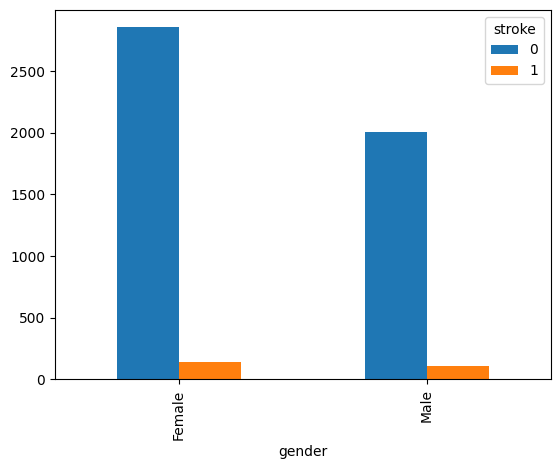

In [29]:
pd.crosstab(df['gender'],df['stroke']).plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

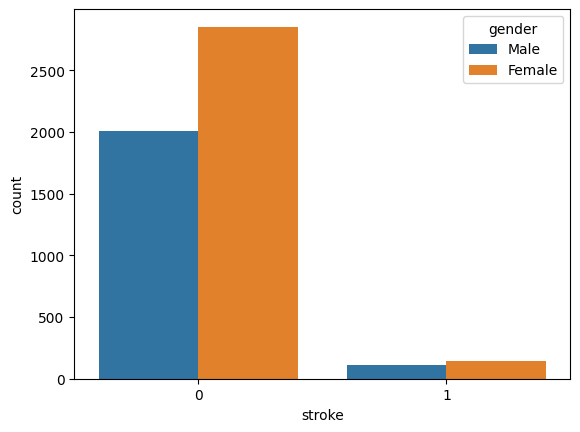

In [30]:
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='hypertension'>

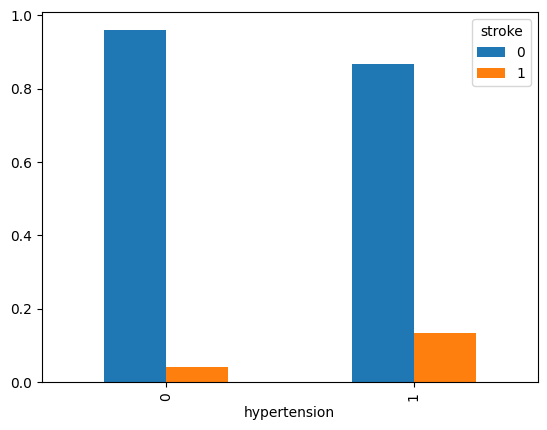

In [31]:
pd.crosstab(df['hypertension'],df['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

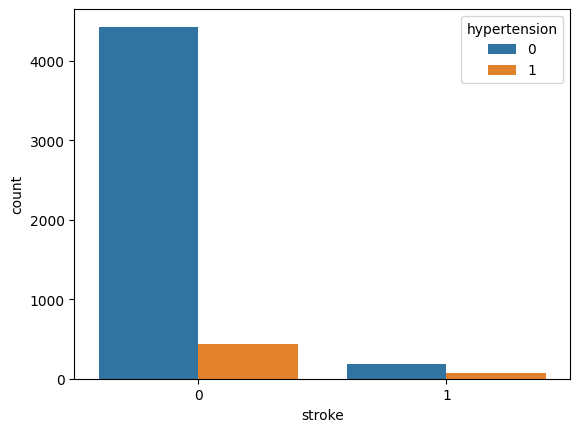

In [32]:
sns.countplot(x='stroke', hue='hypertension', data=df)

<Axes: xlabel='work_type'>

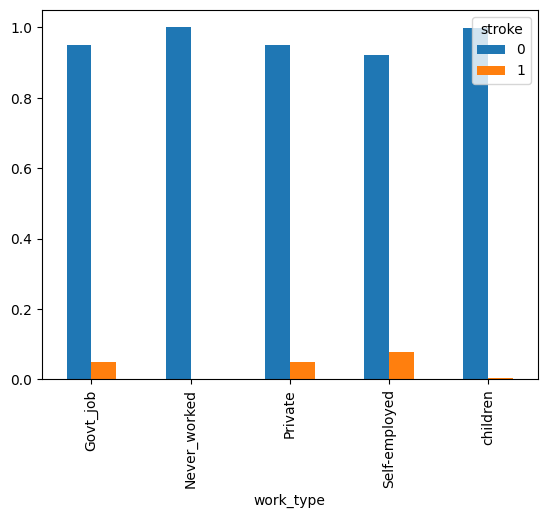

In [33]:
pd.crosstab(df['work_type'],df['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

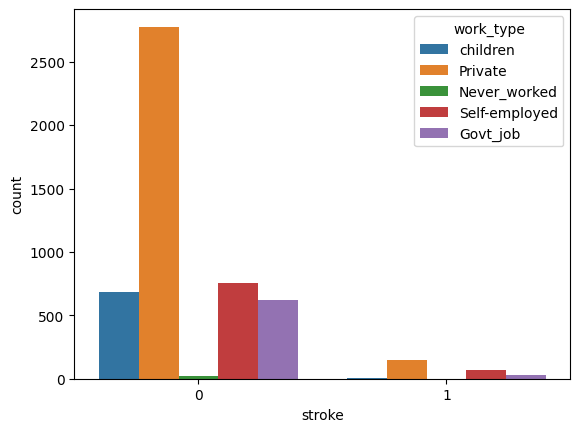

In [34]:
sns.countplot(x='stroke', hue='work_type', data=df)

Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='smoking_status'>

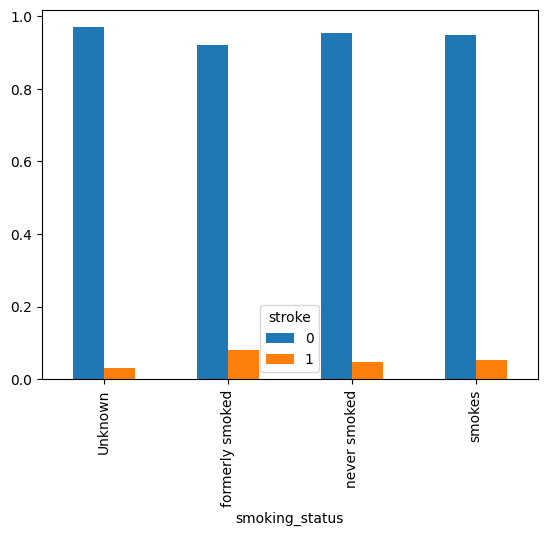

In [35]:
pd.crosstab(df['smoking_status'],df['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

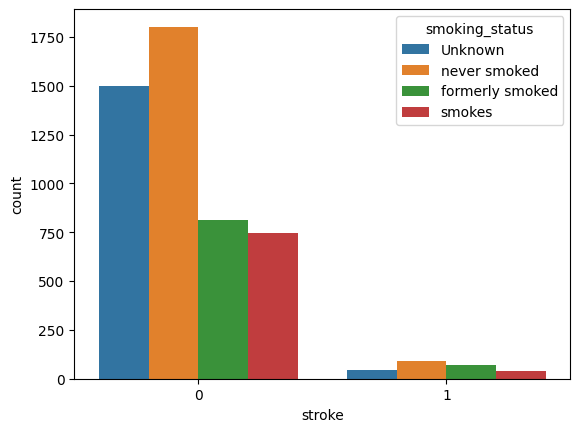

In [36]:
sns.countplot(x='stroke', hue='smoking_status', data=df)

Based on the plot we can that those who formerly smoked got more strokes
The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='Residence_type'>

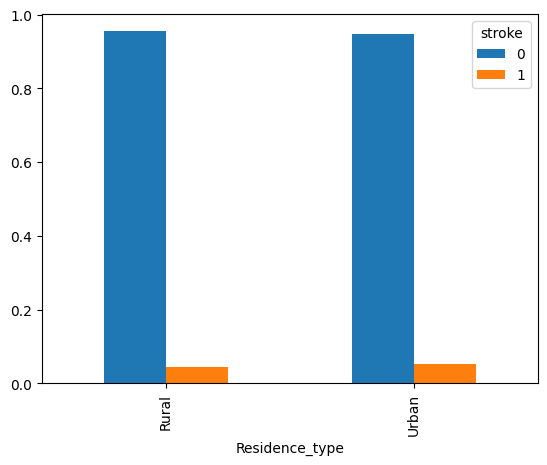

In [37]:
pd.crosstab(df['Residence_type'],df['stroke'],normalize='index').plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

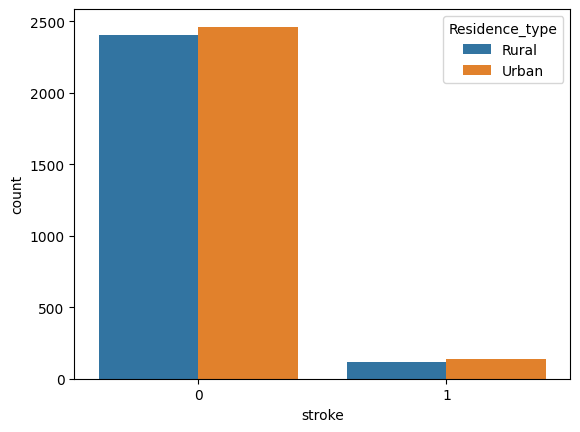

In [38]:
sns.countplot(x='stroke', hue='Residence_type', data=df)

Based on the analysis the people who live in Urban areas were reported with more strokes

BMI analysis

In [39]:
df['bmi'].isnull().sum()

201

We have only na values in bmi column - 201 Null values

In [40]:
df['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

<Axes: xlabel='bmi', ylabel='Count'>

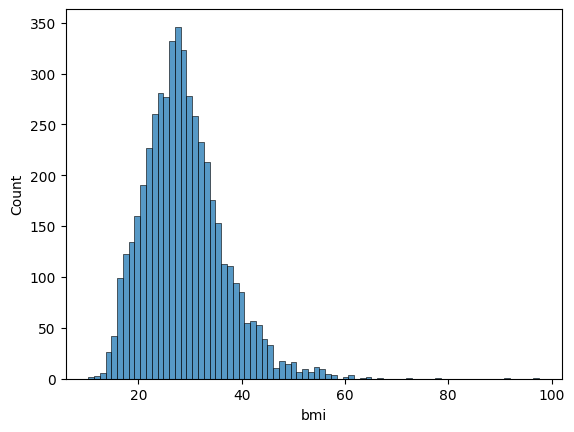

In [41]:
sns.histplot(data=df['bmi'])

Bmi is rightly skewed

<Axes: ylabel='bmi'>

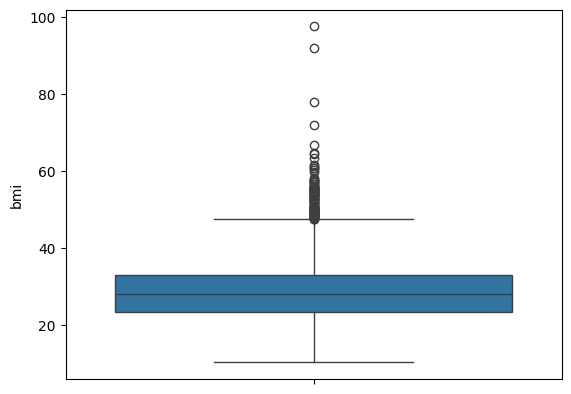

In [42]:
sns.boxplot(data=df['bmi'])

Based on the histogram and boxplot we see that there are many outliers in bmi 

In [43]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

bmi
False    5000
True      110
Name: count, dtype: int64

Total outliers in bmi:110

Total non-outliers in bmi:5000

Hence we will need to make some transformation for future use

In [44]:
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

NULL values hold 3.93 % of the instances in the dataframe

In [45]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [46]:
df['stroke'].sum()/len(df)*100

4.87279843444227

Our main target function is stroke 
And the instances who got a stroke is in the minority - 249 
Which is only 4.9 % of the instances

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


<Axes: >

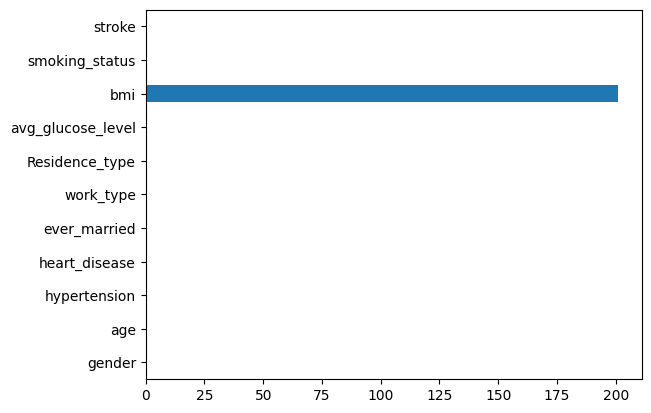

In [47]:
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())
df.isna().sum().plot.barh()

Among the 201 bmi NULL values
40 values in them got stroke 

Thus we cant drop NULL values 

Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
Hence we impute it with median values


In [48]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())
df['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

AGE analysis

In [49]:
df['age'].isnull().sum()

0

We have no na values in age column 

In [50]:
df['age'].value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

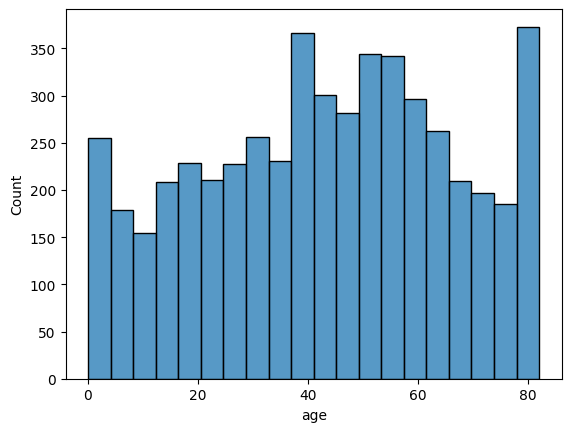

In [51]:
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

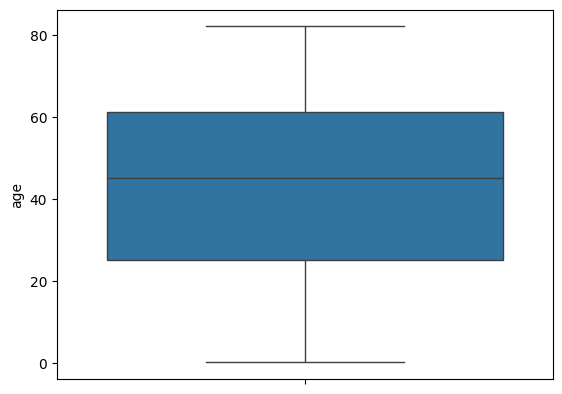

In [52]:
sns.boxplot(data=df['age'])

The age parameter values don’t have any outliers
And has a normal distribution

AVERAGE GLUCOSE LEVEL ANALYSIS

In [53]:
df['avg_glucose_level'].isnull().sum()

0

We have no na values in avg_glucose_levels

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

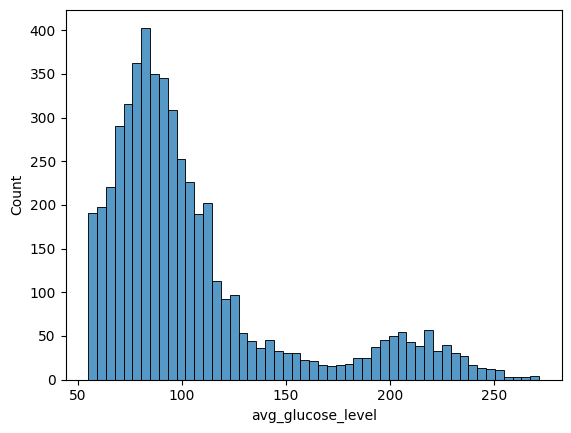

In [54]:
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

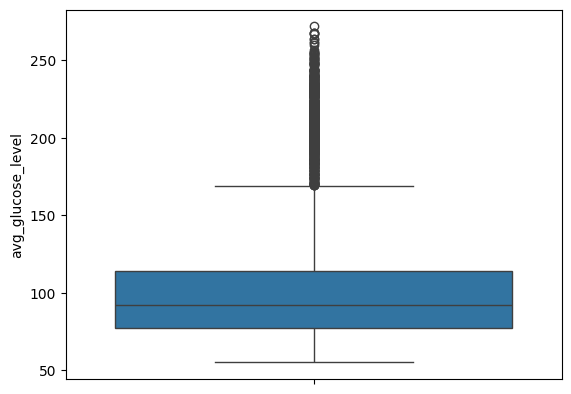

In [55]:
sns.boxplot(data=df['avg_glucose_level'])

There are many outliers present based on the boxplot and histogram
The data is positively skewed therefore we need to perform some transformations for future use

In [56]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4483
True      627
Name: count, dtype: int64

Total outliers in avg_glucose_level:627

Total non-outliers in avg_glucose_level:4483

In [57]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

ValueError: could not convert string to float: 'Yes'

There is  a weak correlation between the attributes as per the plotted heatmap
The highest correlation found was between age and bmi - 0.32
Rest all correlations were less than 0.32
Hence no statistical insight could be drawn from heatmap

Heart_disease analysis 

In [ ]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

This data reflects that around 94.5 % of the total population or list of people are free from Heart_disease and only 6.5 % are having heart_disease.

<AxesSubplot:ylabel='heart_disease'>

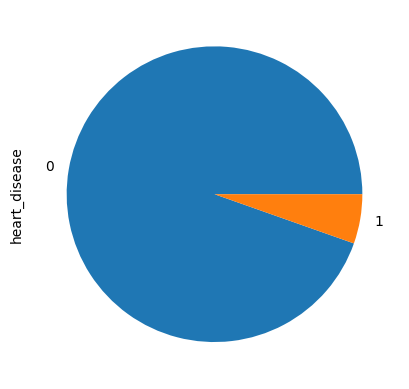

In [ ]:
df['heart_disease'].value_counts().plot(kind="pie")

Ever_married analysis with Values

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

This result shows that 65.6 % of people from the list are married and 34.4 % are unmarried.

<AxesSubplot:ylabel='ever_married'>

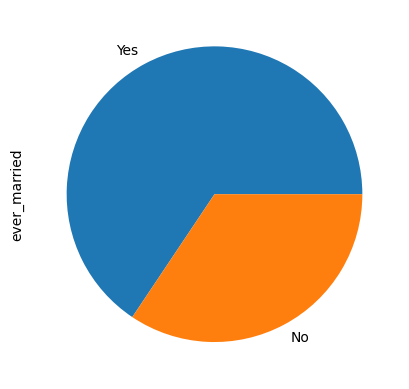

In [ ]:
df['ever_married'].value_counts().plot(kind="pie")

Cross Analysis for Strokes and Heart Disease

<AxesSubplot:xlabel='heart_disease'>

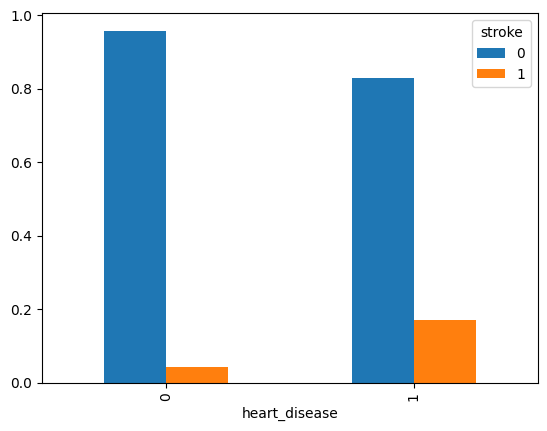

In [ ]:
pd.crosstab(df['heart_disease'],df['stroke'],normalize='index').plot.bar()

<AxesSubplot:xlabel='stroke', ylabel='count'>

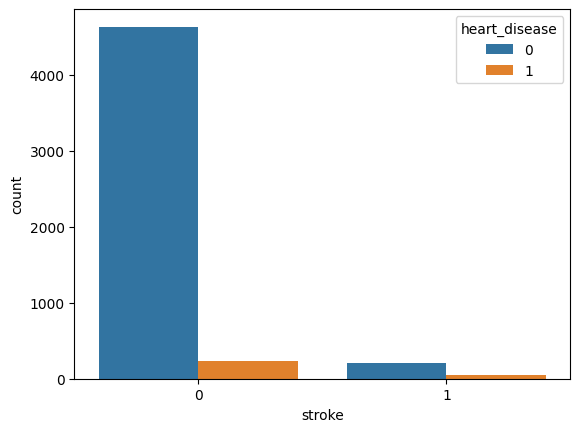

In [ ]:
sns.countplot(x='stroke', hue='heart_disease', data=df)

This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

Cross Analysis for Strokes and Marriage Status

<AxesSubplot:xlabel='ever_married'>

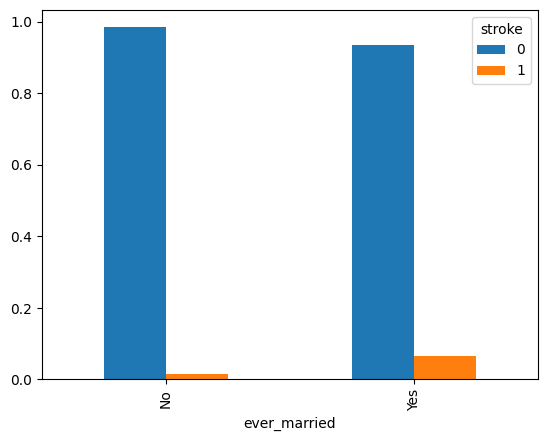

In [ ]:
pd.crosstab(df['ever_married'],df['stroke'],normalize='index').plot.bar()

<AxesSubplot:xlabel='stroke', ylabel='count'>

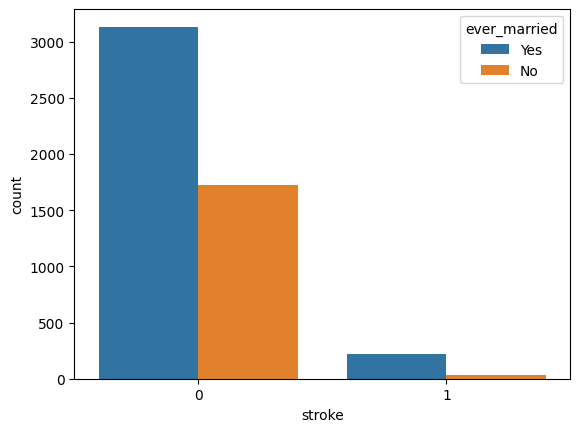

In [ ]:
sns.countplot(x='stroke', hue='ever_married', data=df)

This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
This shows most of the Married people got Strokes compared to Unmarried people.